In [8]:
%cd eye-Image-Analysis/eye-Image-Analysis/

[Errno 2] No such file or directory: 'eye-Image-Analysis/eye-Image-Analysis/'
/home/ec2-user/SageMaker/eye-Image-Analysis/eye-Image-Analysis/eye-Image-Analysis


In [9]:
# !git clone https://github.com/GustavoMourao/eye-Image-Analysis
# !pip install -U efficientnet==0.0.4
# !pip install pillow==4.0.0
!pip install keras
!pip install pydot
!pip install seaborn==0.9.0
!sudo -H pip install seaborn==0.9.0

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.2, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
from Interpreter import Interpreter

### Import set of data from repository and configure figure size

In [24]:
TARGET_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 100
IMAGE_SHAPE_EFFI = (224, 224, 1)

inter = Interpreter(
    BATCH_SIZE,
    IMAGE_SHAPE_EFFI,
    EPOCHS,
    TARGET_SIZE
)

In [25]:
train_images, validation_images, test_images = inter.split_data()

Found 706 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


### Train simplified model

In [26]:
# Single model.
model, model_out = inter.train_model(
    train_images,
    validation_images,
    'Nadam'
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
activation_36 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 109, 109, 16)      4624      
_________________________________________________________________
activation_37 (Activation)   (None, 109, 109, 16)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 52, 52, 24)       

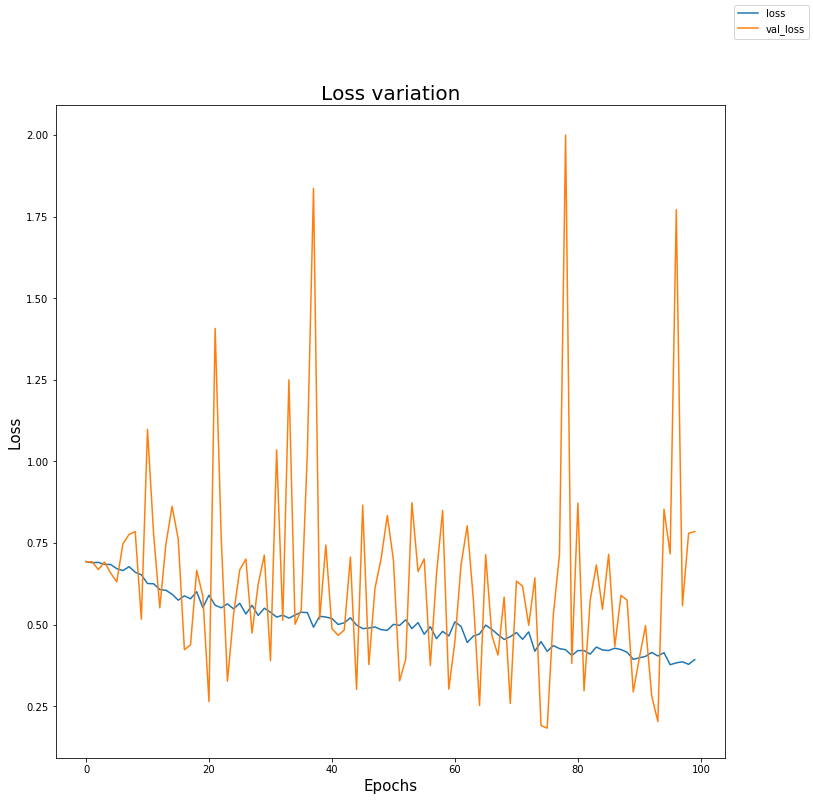

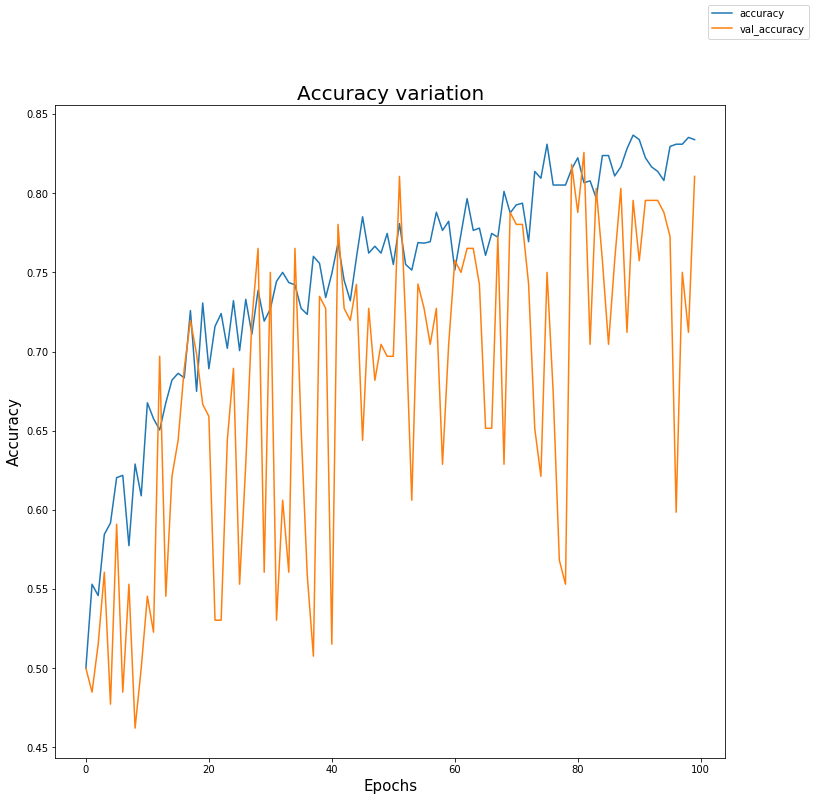

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


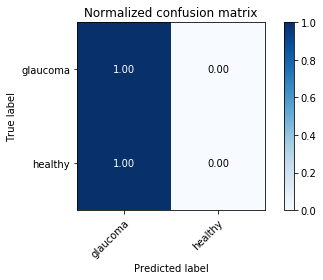

Accuracy: 

0.5


In [27]:
# Get score of test data from trained model.
inter.model_evaluation_test(
    test_images,
    validation_images,
    model,
    model_out
)

### Train Resnet v1 model

In [ ]:
n = 3
depth = n * 6 + 2
model, model_out = inter.resnet_v1(
    input_shape=IMAGE_SHAPE_EFFI,
    depth=depth,
    train_images=train_images,
    test_images=test_images,
    optimizer_test='Nadam',
    validation_images=validation_images
)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 224, 224, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 224, 224, 16) 64          conv2d_40[0][0]                  
__________________________________________________________________________________________________
activation_44 (Activation)      (None, 224, 224, 16) 0           batch_normalization_23[0][0]     
____________________________________________________________________________________________

In [ ]:
# Get score of test data from trained model.
inter.model_evaluation_test(
    test_images,
    validation_images,
    model,
    model_out    
)